In [86]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [87]:
df = pd.read_csv('hotel_bookings_data.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,3,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,4,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0,No Deposit,NaN,NaN,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,0,No Deposit,304.0,NaN,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,No Deposit,240.0,NaN,0,Personal,98.0,0,1,Check-Out


In [88]:
cat = df.select_dtypes(include='object')
num = df.drop(columns=cat.columns)

In [89]:
df.shape

(119390, 29)

# Exploratory Data Analysis

In [90]:
def month_name_to_number(df, month_col):
  month_names = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
  month_numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

  df[month_col] = df[month_col].map(lambda x: month_numbers[month_names.index(x)])

  return df

def number_to_month(df, month_col):
  month_names = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
  month_numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

  df[month_col] = df[month_col].map(lambda x: month_names[month_numbers.index(x)])

  return df

In [91]:
x = df.groupby(['hotel','arrival_date_year','arrival_date_month']).aggregate({'is_canceled':'count'}).rename(columns={'is_canceled':'total'}).reset_index()

import pandas as pd

x = month_name_to_number(x, 'arrival_date_month').sort_values(['hotel','arrival_date_year','arrival_date_month'])
x = number_to_month(x, 'arrival_date_month')
x

,hotel,arrival_date_year,arrival_date_month,total
2,City Hotel,2017,January,1235
1,City Hotel,2017,February,1654
5,City Hotel,2017,September,1398
4,City Hotel,2017,October,2480
3,City Hotel,2017,November,3529
0,City Hotel,2017,December,3386
10,City Hotel,2018,January,3122
9,City Hotel,2018,February,2478
13,City Hotel,2018,March,1364
6,City Hotel,2018,April,2371


In [94]:
df['Total Customer'] = df['adults'] + df['children'] + df['babies']

df['arrival_date_year'] = df['arrival_date_year'].replace(2019,2017)
dfg = df.groupby(['hotel','arrival_date_year','arrival_date_month']).aggregate({'Total Customer' : 'count'}).reset_index()

dfg = month_name_to_number(dfg, 'arrival_date_month').sort_values(['hotel','arrival_date_year','arrival_date_month'])
dfg = number_to_month(dfg, 'arrival_date_month')

dfg['period'] = dfg.apply(lambda x: f"{x['arrival_date_year']}-{x['arrival_date_month']}", axis = 1)
dfg = dfg[['hotel','period','Total Customer']]
dfg.head()

,hotel,period,Total Customer
4,City Hotel,2017-January,1235
3,City Hotel,2017-February,1654
7,City Hotel,2017-March,2372
0,City Hotel,2017-April,2594
8,City Hotel,2017-May,3412


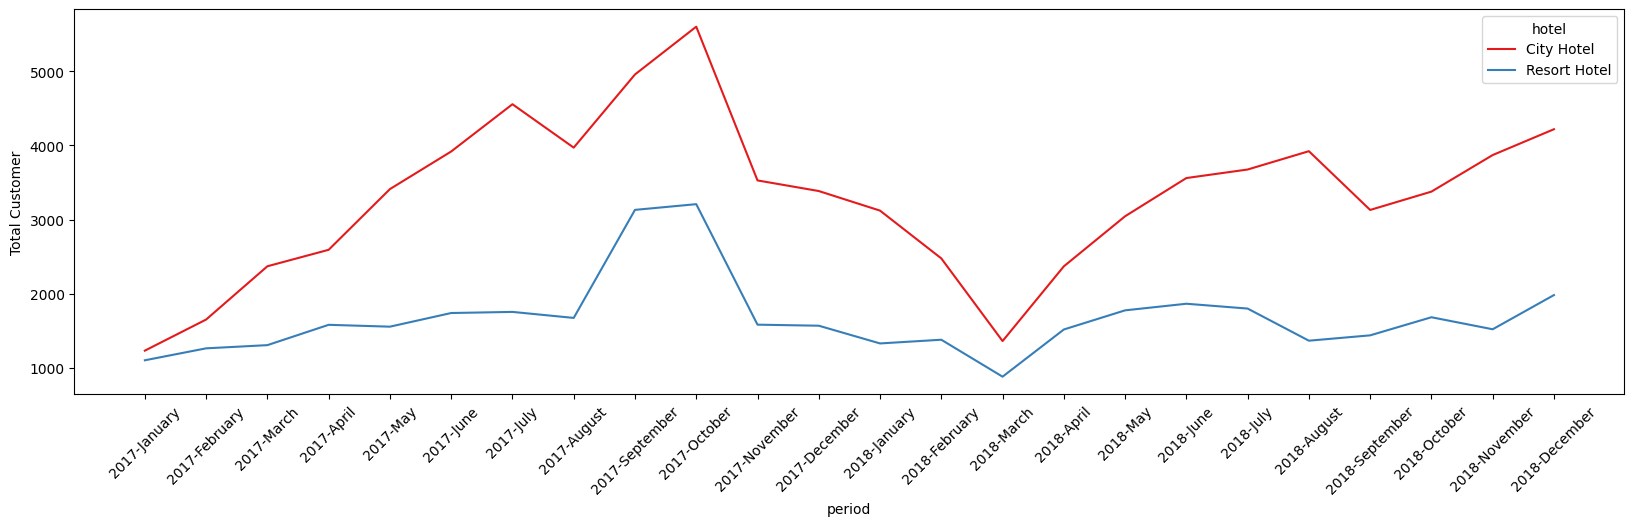

In [124]:
plt.figure(figsize=(20,5))
sns.lineplot(data = dfg, x = 'period', y = 'Total Customer', hue = 'hotel', palette='Set1')
plt.xticks(rotation = 45)
plt.show()

# Preprocessing

In [ ]:
cat.describe().T

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
arrival_date_month,119390,12,October,13877
meal,119390,5,Breakfast,92310
city,118902,177,Kota Denpasar,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
deposit_type,119390,3,No Deposit,104641
customer_type,119390,4,Personal,89613
reservation_status,119390,3,Check-Out,75166


In [ ]:
num.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2018.156554,0.707476,2017.00,2018.00,2018.000,2019.0,2019.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_weekdays_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


## Handling Missing Values

In [ ]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_weekdays_nights               0
adults                                 0
children                               4
babies                                 0
meal                                   0
city                                 488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type   

In [ ]:
df['children'].fillna(df['children'].mode()[0], inplace= True)
df['city'].fillna(df['city'].mode()[0], inplace= True)
df['agent'].fillna(0, inplace= True)
df['company'].fillna(0, inplace= True)

## Handling Invalid Values

In [ ]:
df['meal'].unique()

array(['Breakfast', 'Full Board', 'Dinner', 'No Meal', 'Undefined'],
      dtype=object)

In [ ]:
df['meal'].replace('Undefined','No Meal',inplace=True)

## Handling Unnecessary Data

In [ ]:
df = df.drop(df[df['Total Customer'] == 0].index)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler()
df[df['arrival_date_month'].isin(['September','October'])]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,Total Customer
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Personal,0.00,0,0,Check-Out,2.0
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Personal,0.00,0,0,Check-Out,2.0
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Personal,75.00,0,0,Check-Out,1.0
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Personal,75.00,0,0,Check-Out,1.0
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Personal,98.00,0,1,Check-Out,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,October,35,30,2,5,2,...,No Deposit,394.0,0.0,0,Personal,96.14,0,0,Check-Out,2.0
119386,City Hotel,0,102,2017,October,35,31,2,5,3,...,No Deposit,9.0,0.0,0,Personal,225.43,0,2,Check-Out,3.0
119387,City Hotel,0,34,2017,October,35,31,2,5,2,...,No Deposit,9.0,0.0,0,Personal,157.71,0,4,Check-Out,2.0
119388,City Hotel,0,109,2017,October,35,31,2,5,2,...,No Deposit,89.0,0.0,0,Personal,104.40,0,0,Check-Out,2.0


<Axes: >

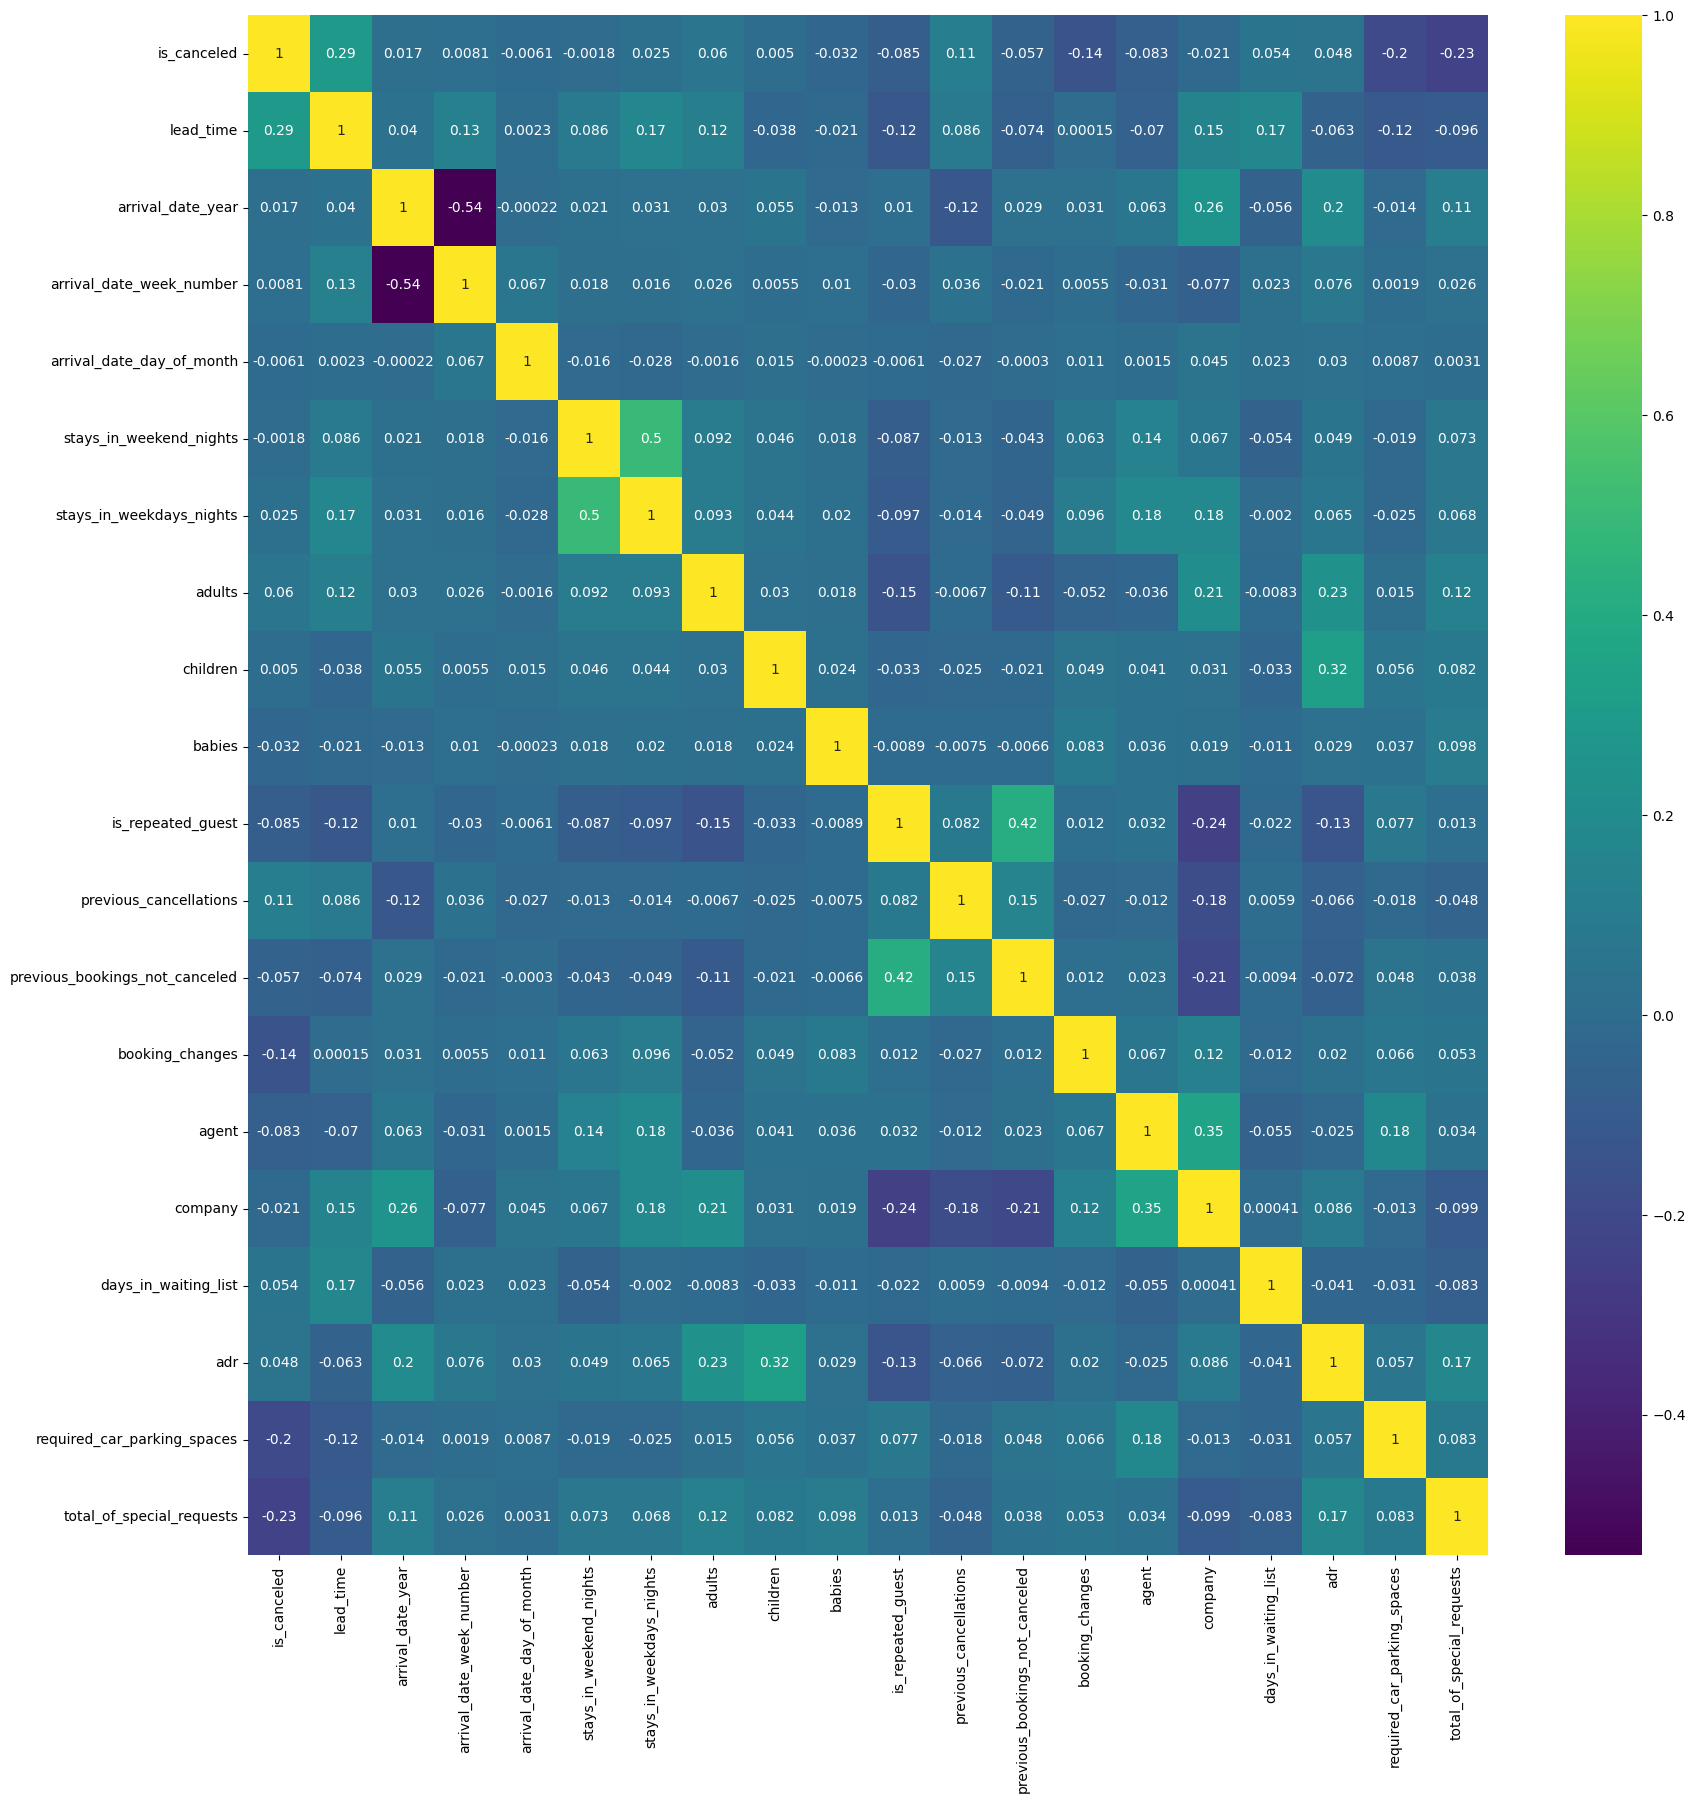

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(num.corr(), annot=True,cmap='viridis')

<Axes: >

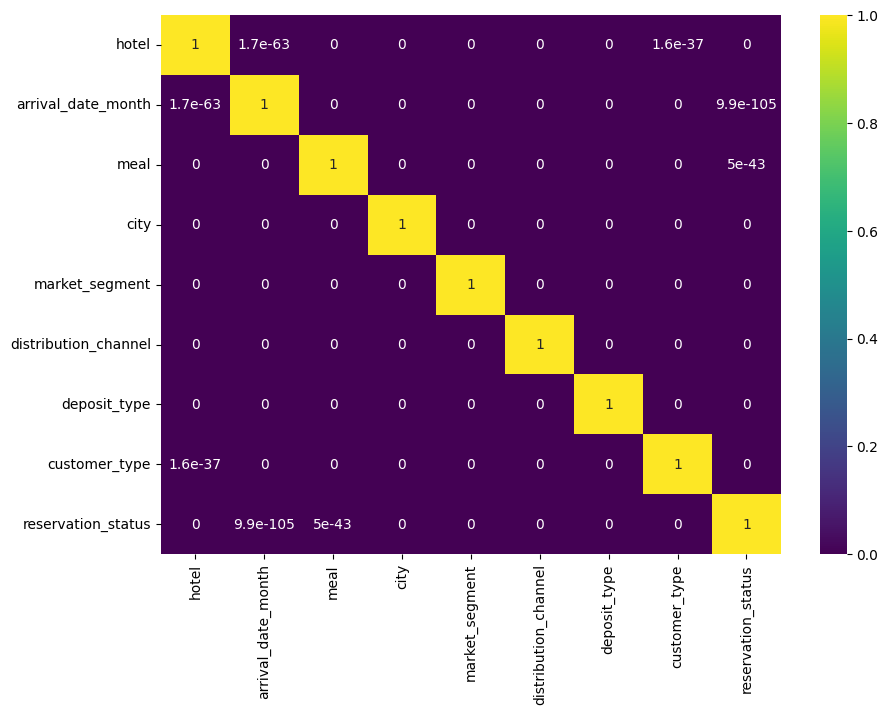

In [ ]:
from scipy.stats import chi2_contingency
import numpy as np

def categorical_correlation(df):
    correlations = pd.DataFrame(index=df.columns, columns=df.columns, dtype=float)
    
    for feature1 in df.columns:
        for feature2 in df.columns:
            if feature1 == feature2:
                correlations.loc[feature1, feature2] = 1.0
            else:
                contingency_table = pd.crosstab(df[feature1], df[feature2])
                _, p_value, _, _ = chi2_contingency(contingency_table)
                n = np.sum(contingency_table.values)
                phi_cramers = np.sqrt(p_value / (n * (min(contingency_table.shape) - 1)))
                correlations.loc[feature1, feature2] = phi_cramers
    
    return correlations

plt.figure(figsize=(10,7))
sns.heatmap(categorical_correlation(cat),annot=True, cmap='viridis')